In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.misc as sm
data_dir = '/home/lioruzan/pixel-cnn/data/letters_data'
import pickle as pkl

with open(os.path.join(data_dir,'letters_test.pkl'),'rb') as f:
    test_letters= pkl.load(f)

In [7]:
t=test_letters['labels'][:36]

In [64]:
''' PARSE DATA '''
import pandas as pd
import os

labels_csv = os.path.join('letters_data', 'labels.csv')
df = pd.read_csv(labels_csv, encoding='ISO-8859-8', header=None)
df = df.applymap(str.strip)

# clean data
doubles = df.applymap(lambda x: True if len(x)>1 and x.find('!') == -1 else False)[1]
X       = df.applymap(lambda x: True if x == 'X' else False)[1]

df = df[~doubles & ~X].reset_index(drop=True)

# label fix ש -> ה
df.iloc[3659][1]='ה!'

root = 'letters_data'
file_list = []
label_list = []
for _,y in df.iterrows():
    file_list.append(os.path.join(root,y[0][1:].replace('\\','/')))
    label_list.append(y[1])

l = sorted(list(set(label_list)))

In [72]:
def reverse(l):
    n=len(l)
    return [l[j] for j in range(n-1,-1,-1)]
s = [l[i] for i in t]
for i in range(6):
    print('{:>2}\t{:>2}\t{:>2}\t{:>2}\t{:>2}\t{:>2}\t'.format(*reverse(s[6*i:6*(i+1)])))
    print()

ה!	 ה	 פ	 ס	 ד	 ר	

 מ	 ת	 ה	 ט	 ם	 צ	

 ר	 א	 ר	 ם	 ה	 ה	

 ה	 נ	 ל	 ג	 ך	 ל	

 ל	 ם	 מ	 י	 ו	 ד	

 ק	 ש	 א	 ה	 ה	 ה	



י


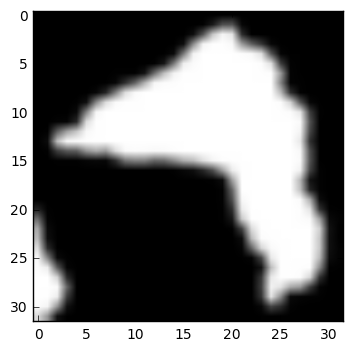

In [45]:
r = np.random.randint(36)
print(l[t[r]])
plt.imshow(test_letters['data'][r])
plt.show()